# DBSCAN By Musa Alubaid

In [2]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import plotly.express as px
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score as ss


## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

In [9]:
df = pd.read_csv("clean_data.csv")

In [10]:
df.head()

,Company,Opening,Top,Lowest,Closing,Change,Change %,Traded Quantity,Trading value (SAR),Sector
0,أرامكو السعودية,34.85,35.15,26.80,27.95,-6.90,-19.80,5.543659e+09,2.085716e+09,الطاقة
1,أديس,17.54,26.10,14.84,20.48,2.94,16.76,1.560799e+09,6.641273e+07,الطاقة
2,بترو رابغ,10.56,11.06,6.58,8.20,-2.36,-22.35,6.296730e+08,1.084501e+08,الطاقة
3,البحري,23.52,30.40,21.36,29.60,6.08,25.85,1.633857e+08,1.438393e+07,الطاقة
4,الدريس,102.49,147.81,82.53,123.20,20.71,20.21,9.663517e+07,4.292462e+07,الطاقة


Chosen eps: 0.9
Chosen min_samples: 3
Silhouette Score: 0.415
Davies-Bouldin Index: 1.978


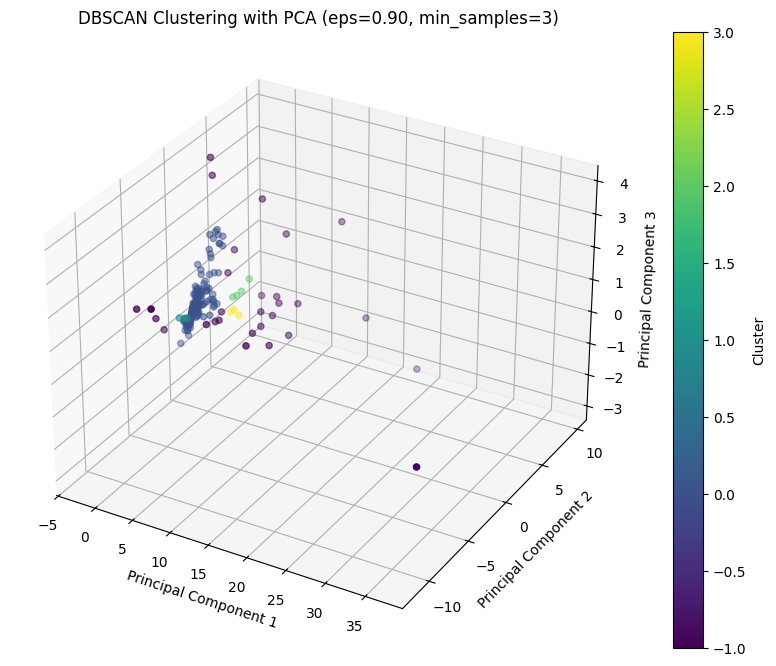

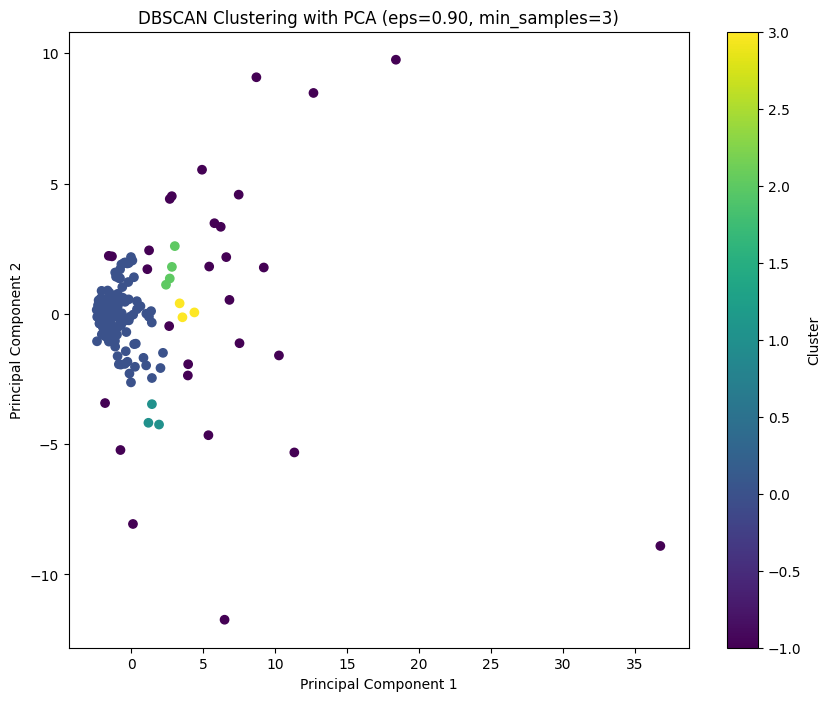

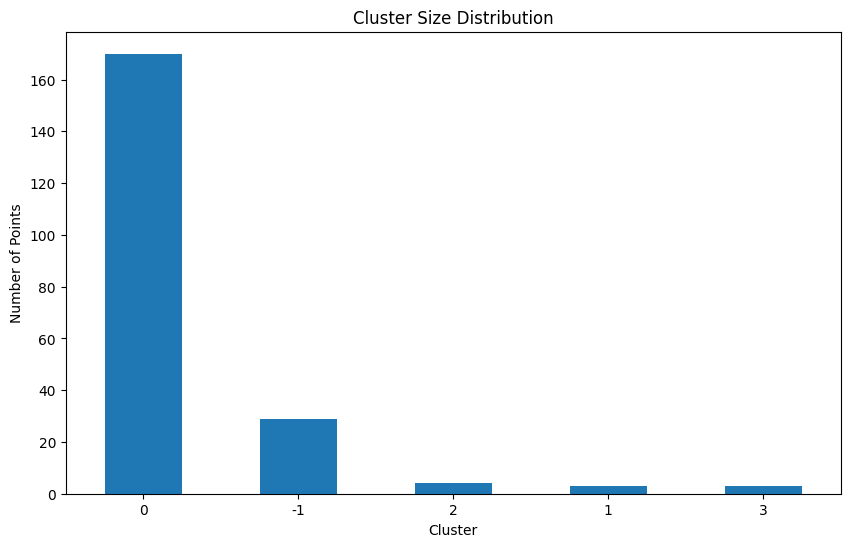

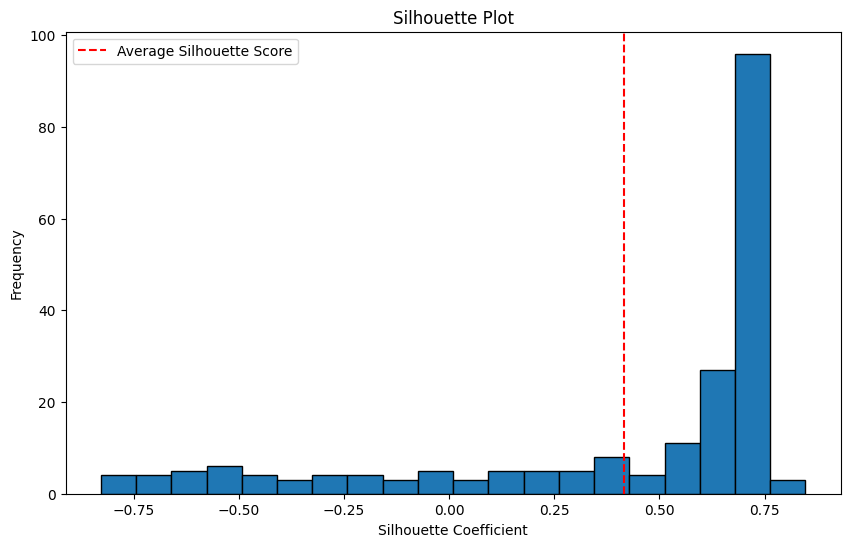

Number of outliers detected: 29
Outliers:
                 Company        PC1        PC2       PC3
4                 الدريس   2.635864  -0.470685  0.009145
5          الحفر العربية   0.121409  -8.061932  1.528088
13       أنابيب السعودية   1.240146   2.436235  1.256346
22                أنابيب   4.918097   5.529403  1.356884
27   الصناعات الكهربائية  -1.556927   2.225396  3.954298
39        أسترا الصناعية   5.780050   3.477350 -0.131347
40     الكابلات السعودية   2.677561   4.409104 -0.497705
50                   سال  12.659789   8.474928 -1.404312
58                  نسيج   1.119765   1.713015  0.677258
69                الآمار  -0.747302  -5.224518  0.579749
70          لجام للرياضة   6.823368   0.535058 -0.376605
72       الوطنية للتعليم   7.464915   4.573327 -0.473162
76               العربية   5.362346  -4.656354  0.691443
77      الأبحاث والإعلام   9.208583   1.778141 -0.763124
90                  ثمار  -1.816544  -3.423076 -0.219836
110               سدافكو  11.330092  -5.317467

In [5]:
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, silhouette_samples
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np


# 1. Data cleaning
df.columns = df.columns.str.strip()

# 2. Scaling data
scaler = RobustScaler()
scaled_data = scaler.fit_transform(df[['Opening', 'Closing', 'Top', 'Lowest', 'Change', 'Change %']])

# 3. PCA transformation
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)

# 4. Parameter tuning (you can implement a method to find optimal parameters)
eps_value = 0.9  # Example value for eps
min_samples_value = 3  # Example value for min_samples

# Apply DBSCAN with chosen parameters
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
clusters = dbscan.fit_predict(pca_result)

# 5. Compute evaluation metrics
if len(set(clusters)) > 1 and len(set(clusters)) < len(pca_result):  # Ensure at least 2 clusters and not all noise
    silhouette_avg = silhouette_score(pca_result, clusters)
    db_index = davies_bouldin_score(pca_result, clusters)
else:
    silhouette_avg = -1
    db_index = np.inf

# Print evaluation metrics
print(f'Chosen eps: {eps_value}')
print(f'Chosen min_samples: {min_samples_value}')
print(f'Silhouette Score: {silhouette_avg:.3f}')
print(f'Davies-Bouldin Index: {db_index:.3f}')

# Convert PCA results to DataFrame for visualization
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])
pca_df['Cluster'] = clusters
pca_df['Company'] = df['Company'].values  # Ensure consistency with original DataFrame

# 6. 3D Plotting results
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['Cluster'], cmap='viridis', marker='o')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title(f'DBSCAN Clustering with PCA (eps={eps_value:.2f}, min_samples={min_samples_value})')
plt.colorbar(scatter, label='Cluster')
plt.show()

# 7. 2D Plotting results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', marker='o')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'DBSCAN Clustering with PCA (eps={eps_value:.2f}, min_samples={min_samples_value})')
plt.colorbar(label='Cluster')
plt.show()

# 8. Cluster Size Distribution
cluster_sizes = pca_df['Cluster'].value_counts()
plt.figure(figsize=(10, 6))
cluster_sizes.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Number of Points')
plt.title('Cluster Size Distribution')
plt.xticks(rotation=0)  # Rotate x labels for better readability
plt.show()

# 9. Optional: Silhouette Plot
if len(set(clusters)) > 1:
    silhouette_vals = silhouette_samples(pca_result, clusters)
    plt.figure(figsize=(10, 6))
    plt.hist(silhouette_vals, bins=20, edgecolor='k')
    plt.title('Silhouette Plot')
    plt.xlabel('Silhouette Coefficient')
    plt.ylabel('Frequency')
    plt.axvline(x=silhouette_avg, color='red', linestyle='--', label='Average Silhouette Score')
    plt.legend()
    plt.show()

# 10. Consideration for Further Analysis
# Print out outliers
outliers = pca_df[pca_df['Cluster'] == -1]
print(f'Number of outliers detected: {len(outliers)}')
print('Outliers:')
print(outliers[['Company', 'PC1', 'PC2', 'PC3']])

In [8]:
pca_df['Cluster'].value_counts()

Cluster
 0    170
-1     29
 2      4
 1      3
 3      3
Name: count, dtype: int64

In [6]:
# Create a summary table with company names for each cluster
cluster_summary = pca_df.groupby('Cluster')['Company'].apply(list).reset_index()

# Rename the columns for clarity
cluster_summary.columns = ['Cluster', 'Companies']

# Display the summary table
print("Cluster Summary:")
for index, row in cluster_summary.iterrows():
    print(f"Cluster {row['Cluster']}: {', '.join(row['Companies'])}")

Cluster Summary:
Cluster -1: الدريس, الحفر العربية, أنابيب السعودية, أنابيب, الصناعات الكهربائية, أسترا الصناعية, الكابلات السعودية, سال, نسيج, الآمار, لجام للرياضة, الوطنية للتعليم, العربية, الأبحاث والإعلام, ثمار, سدافكو, الكيميائية, سليمان الحبيب, رعاية, دله الصحية, جمجوم فارما, مجموعة تداول, تكافل الراجحي, سلوشنز, ام آي اس, علم, عذيب للإتصالات, أكوا باور, الخريف
Cluster 0: أرامكو السعودية, أديس, بترو رابغ, البحري, المصافي, الكثيري, كيان السعودية, التصنيع, معادن, سبكيم العالمية, سابك, المجموعة السعودية, الزامل للصناعة, ينساب, مبكو, تكوين, اللجين, المتقدمة, اليمامة للحديد, أماك, كيمانول, أسمنت نجران, باتك, أميانتيت, الخزف السعودي, مسك, شاكر, تالكو, البابطين, بوان, صادرات, العمران, الخضري, سماسكو, مهارة, صدر, كاتريون, طباعة وتغليف, الخدمات الأرضية, سابتكو, سيسكو القابضة, لومي, ذيب, بدجت السعودية, مجموعة فتيحي, الأصيل, لازوردي, صدق, ارتيكس, شمس, أمريكانا, مجموعة الحكير, سيرا, الخليج للتدريب, ريدان, التطويرية الغذائية, هرفي للأغذية, عطاء, دور, مجموعة إم بي سي, تهامة, باعظيم, جرير, السيف